# Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    recall_score,
    precision_score,
    roc_curve
)

from matplotlib import pyplot

# Data Inspection & Cleaning

In [2]:
# Loading CSV file into DataFrame
file_name = "default of credit card clients.csv"
df = pd.read_csv(file_name, sep=";") #separating on semicolons to adjust from expected normal colon

pd.set_option('display.max_columns', None)
df.head()


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
# Take the first row as column names
df.columns = df.iloc[0]

# Drop the first row now that it's set as the header
df = df.iloc[1:].reset_index(drop=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# renaming cloumn to keep consistency among feature naming (1-6)
df = df.rename(columns={'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#Checking for missing values & datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [6]:
# Inspecting value ranges for each feature to look for outliers
for col in df.columns:
    print(f"{col}: {np.sort(df[col].unique())}")

ID: ['1' '10' '100' ... '9997' '9998' '9999']
LIMIT_BAL: ['10000' '100000' '1000000' '110000' '120000' '130000' '140000' '150000'
 '16000' '160000' '170000' '180000' '190000' '20000' '200000' '210000'
 '220000' '230000' '240000' '250000' '260000' '270000' '280000' '290000'
 '30000' '300000' '310000' '320000' '327680' '330000' '340000' '350000'
 '360000' '370000' '380000' '390000' '40000' '400000' '410000' '420000'
 '430000' '440000' '450000' '460000' '470000' '480000' '490000' '50000'
 '500000' '510000' '520000' '530000' '540000' '550000' '560000' '570000'
 '580000' '590000' '60000' '600000' '610000' '620000' '630000' '640000'
 '650000' '660000' '670000' '680000' '690000' '70000' '700000' '710000'
 '720000' '730000' '740000' '750000' '760000' '780000' '80000' '800000'
 '90000']
SEX: ['1' '2']
EDUCATION: ['0' '1' '2' '3' '4' '5' '6']
MARRIAGE: ['0' '1' '2' '3']
AGE: ['21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34'
 '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' 

In [7]:
unique_ids = df["ID"].nunique()
print(f"Number of unique IDs: {unique_ids}")

Number of unique IDs: 30000


In [8]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Check the data types after conversion
print(df.dtypes)

# Inspecting new value ranges for each feature
for col in df.columns:
    print(f"{col}: {np.sort(df[col].unique())}")

0
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object
ID: [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL: [  10000   16000   20000   

In [9]:
# Calculate value counts and percentages
target_counts = df["default payment next month"].value_counts()
target_percentages = target_counts / len(df) * 100

# Display results
print("Distribution of target variable (default payment next month):")
print(target_counts)
print("\nPercentage distribution:")
print(target_percentages)


Distribution of target variable (default payment next month):
default payment next month
0    23364
1     6636
Name: count, dtype: int64

Percentage distribution:
default payment next month
0    77.88
1    22.12
Name: count, dtype: float64


# Data Preparation

### Train Test Split

In [10]:
# Define features and target
features = [col for col in df.columns if col != "default payment next month"]  # All features except target
target = "default payment next month"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 24000
Test set size: 6000


In [11]:
y.mean()

0.2212

# Logistic Regression

/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Baseline AUC-ROC: 0.7088027213363626

Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



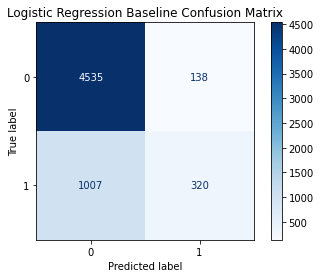

In [12]:
# Logistic Regression Baseline
logreg_baseline = LogisticRegression(max_iter=10000, random_state=42)
logreg_baseline.fit(X_train, y_train)

# Predict and evaluate
y_proba_baseline = logreg_baseline.predict_proba(X_test)[:, 1]
y_pred_baseline = logreg_baseline.predict(X_test)

# Evaluation
print("Logistic Regression Baseline AUC-ROC:", roc_auc_score(y_test, y_proba_baseline))
print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_baseline))


# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=logreg_baseline.classes_).plot(cmap="Blues")
plt.title("Logistic Regression Baseline Confusion Matrix")
plt.show()

# Logisitic Regression w/ SMOTE

Logistic Regression with SMOTE AUC-ROC: 0.6981239208517367

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      4673
           1       0.39      0.59      0.47      1327

    accuracy                           0.70      6000
   macro avg       0.63      0.66      0.63      6000
weighted avg       0.76      0.70      0.72      6000



/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


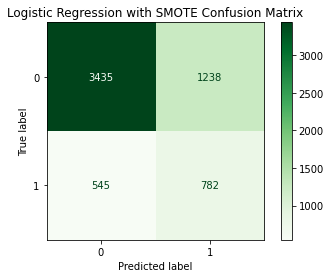

In [13]:
# Logistic Regression with SMOTE
logreg_smote_pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),  # SMOTE for balancing classes
    ("logreg", LogisticRegression(max_iter=10000, random_state=42))
])

# Train the pipeline
logreg_smote_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_proba_smote = logreg_smote_pipeline.predict_proba(X_test)[:, 1]
y_pred_smote = logreg_smote_pipeline.predict(X_test)

# Evaluation
print("Logistic Regression with SMOTE AUC-ROC:", roc_auc_score(y_test, y_proba_smote))
print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=logreg_smote_pipeline.named_steps['logreg'].classes_).plot(cmap="Greens")
plt.title("Logistic Regression with SMOTE Confusion Matrix")
plt.show()


# Logistic Regression w/ GridSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Baseline GridSearch): {'logreg__C': 0.01, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Logistic Regression Baseline (GridSearch) AUC-ROC: 0.7097141767930089

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.71      0.23      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



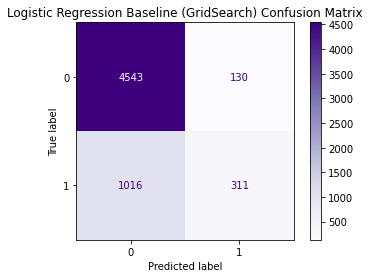

In [14]:
# Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ("logreg", LogisticRegression(max_iter=10000, random_state=42))
])

# Hyperparameter Grid
param_grid_baseline = {
    "logreg__C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "logreg__penalty": ['l1', 'l2'],       # Regularization type
    "logreg__solver": ['liblinear']        # Solver that supports L1 and L2
}

# Grid Search
grid_baseline = GridSearchCV(logreg_pipeline, param_grid_baseline, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_baseline.fit(X_train, y_train)

# Best Model
print("Best Parameters (Baseline GridSearch):", grid_baseline.best_params_)
best_logreg_baseline = grid_baseline.best_estimator_

# Predict and evaluate
y_proba_grid_baseline = best_logreg_baseline.predict_proba(X_test)[:, 1]
y_pred_grid_baseline = best_logreg_baseline.predict(X_test)

print("Logistic Regression Baseline (GridSearch) AUC-ROC:", roc_auc_score(y_test, y_proba_grid_baseline))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid_baseline))

# Confusion Matrix
cm_grid_baseline = confusion_matrix(y_test, y_pred_grid_baseline)
ConfusionMatrixDisplay(confusion_matrix=cm_grid_baseline, display_labels=best_logreg_baseline.named_steps['logreg'].classes_).plot(cmap="Purples")
plt.title("Logistic Regression Baseline (GridSearch) Confusion Matrix")
plt.show()

# Logistic Regression w/ SMOTE & GridSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (SMOTE GridSearch): {'logreg__C': 0.01, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Logistic Regression with SMOTE (GridSearch) AUC-ROC: 0.697966206160194

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      4673
           1       0.38      0.59      0.46      1327

    accuracy                           0.70      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.75      0.70      0.72      6000



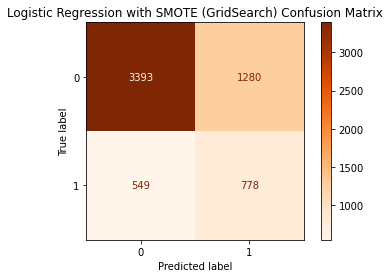

In [15]:
# Pipeline: SMOTE + Logistic Regression
logreg_smote_grid_pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("logreg", LogisticRegression(max_iter=10000, random_state=42))
])

# Hyperparameter Grid
param_grid_smote = {
    "logreg__C": [0.01, 0.1, 1, 10, 100],
    "logreg__penalty": ['l1', 'l2'],
    "logreg__solver": ['liblinear']
}

# Grid Search with SMOTE
grid_smote = GridSearchCV(logreg_smote_grid_pipeline, param_grid_smote, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_smote.fit(X_train, y_train)

# Best Model
print("Best Parameters (SMOTE GridSearch):", grid_smote.best_params_)
best_logreg_smote = grid_smote.best_estimator_

# Predict and evaluate
y_proba_grid_smote = best_logreg_smote.predict_proba(X_test)[:, 1]
y_pred_grid_smote = best_logreg_smote.predict(X_test)

print("Logistic Regression with SMOTE (GridSearch) AUC-ROC:", roc_auc_score(y_test, y_proba_grid_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid_smote))

# Confusion Matrix
cm_grid_smote = confusion_matrix(y_test, y_pred_grid_smote)
ConfusionMatrixDisplay(confusion_matrix=cm_grid_smote, display_labels=best_logreg_smote.named_steps['logreg'].classes_).plot(cmap="Oranges")
plt.title("Logistic Regression with SMOTE (GridSearch) Confusion Matrix")
plt.show()


## AUC-ROC for all Logistic Regression models

In [16]:
# 1. Baseline Logistic Regression
y_proba_baseline_logreg = logreg_baseline.predict_proba(X_test)[:, 1]
auc_baseline_logreg = roc_auc_score(y_test, y_proba_baseline_logreg)

# 2. Logistic Regression with SMOTE
y_proba_smote_logreg = logreg_smote_pipeline.predict_proba(X_test)[:, 1]
auc_smote_logreg = roc_auc_score(y_test, y_proba_smote_logreg)

# 3. Baseline Logistic Regression with GridSearch
y_proba_grid_baseline_logreg = grid_baseline.best_estimator_.predict_proba(X_test)[:, 1]
auc_grid_baseline_logreg = roc_auc_score(y_test, y_proba_grid_baseline_logreg)

# 4. Logistic Regression with SMOTE and GridSearch
y_proba_grid_smote_logreg = grid_smote.best_estimator_.predict_proba(X_test)[:, 1]
auc_grid_smote_logreg = roc_auc_score(y_test, y_proba_grid_smote_logreg)

# Print AUC-ROC Scores for Comparison
print("AUC-ROC Scores for Logistic Regression Models:")
print(f"1. Baseline Logistic Regression: {auc_baseline_logreg:.4f}")
print(f"2. Logistic Regression with SMOTE: {auc_smote_logreg:.4f}")
print(f"3. Baseline Logistic Regression with GridSearch: {auc_grid_baseline_logreg:.4f}")
print(f"4. Logistic Regression with SMOTE and GridSearch: {auc_grid_smote_logreg:.4f}")

AUC-ROC Scores for Logistic Regression Models:
1. Baseline Logistic Regression: 0.7088
2. Logistic Regression with SMOTE: 0.6981
3. Baseline Logistic Regression with GridSearch: 0.7097
4. Logistic Regression with SMOTE and GridSearch: 0.6980


# Random Forest

Baseline Random Forest AUC-ROC: 0.7564438465548936

Classification Report (Baseline Random Forest):
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.37      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.81      0.79      6000



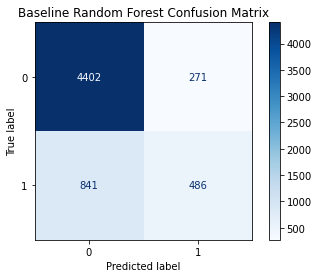

In [17]:
# Baseline Random Forest (no SMOTE, no GridSearch)
rf_baseline = RandomForestClassifier(random_state=42, n_estimators=100)
rf_baseline.fit(X_train, y_train)

# Predict on test data
y_pred_baseline = rf_baseline.predict(X_test)
y_proba_baseline = rf_baseline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Baseline Random Forest AUC-ROC:", roc_auc_score(y_test, y_proba_baseline))
print("\nClassification Report (Baseline Random Forest):")
print(classification_report(y_test, y_pred_baseline))

# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=rf_baseline.classes_).plot(cmap="Blues")
plt.title("Baseline Random Forest Confusion Matrix")
plt.show()

# Random Forest w/SMOTE

Random Forest with SMOTE AUC-ROC: 0.7459406608955131

Classification Report (Random Forest with SMOTE):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4673
           1       0.52      0.47      0.50      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.78      6000



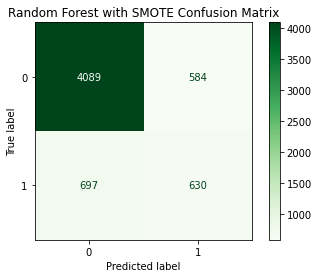

In [18]:
# Random Forest with SMOTE
rf_smote_pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),  # Apply SMOTE
    ("rf", RandomForestClassifier(random_state=42, n_estimators=100))  # Random Forest
])

# Train the pipeline
rf_smote_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_smote = rf_smote_pipeline.predict(X_test)
y_proba_smote = rf_smote_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Random Forest with SMOTE AUC-ROC:", roc_auc_score(y_test, y_proba_smote))
print("\nClassification Report (Random Forest with SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=rf_smote_pipeline.named_steps['rf'].classes_).plot(cmap="Greens")
plt.title("Random Forest with SMOTE Confusion Matrix")
plt.show()

# Random Forest w/ GridSearch

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters (Baseline Random Forest): {'rf__max_depth': 10, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Baseline Random Forest (GridSearch) AUC-ROC: 0.7755634470239092

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



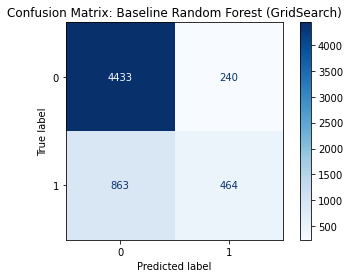

In [19]:
# Define a pipeline with Random Forest (no SMOTE)
rf_pipeline_baseline = Pipeline([
    ("rf", RandomForestClassifier(random_state=42))
])

# Hyperparameter grid
param_grid_baseline = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5, 10]
}

# Perform Grid Search
grid_baseline = GridSearchCV(rf_pipeline_baseline, param_grid_baseline, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_baseline.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Baseline Random Forest):", grid_baseline.best_params_)

# Evaluate best model
y_proba_grid_baseline = grid_baseline.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_grid_baseline = grid_baseline.best_estimator_.predict(X_test)

print("Baseline Random Forest (GridSearch) AUC-ROC:", roc_auc_score(y_test, y_proba_grid_baseline))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid_baseline))


# Generate Confusion Matrix
cm_grid_baseline = confusion_matrix(y_test, y_pred_grid_baseline)

# Display the Confusion Matrix
disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_grid_baseline, display_labels=grid_baseline.best_estimator_.classes_)
disp_baseline.plot(cmap="Blues")
plt.title("Confusion Matrix: Baseline Random Forest (GridSearch)")
plt.show()



# Random Forest w/ SMOTE & GridSearch

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters (Random Forest with SMOTE): {'rf__max_depth': 10, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Random Forest with SMOTE (GridSearch) AUC-ROC: 0.7565452806458755

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.49      0.54      0.51      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.77      0.78      6000



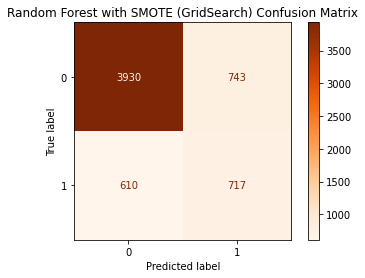

In [20]:
# Random Forest with SMOTE and GridSearch
rf_pipeline_smote = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("rf", RandomForestClassifier(random_state=42))
])

# Hyperparameter grid
param_grid_smote = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5, 10]
}

# Perform Grid Search
grid_smote = GridSearchCV(rf_pipeline_smote, param_grid_smote, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_smote.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Random Forest with SMOTE):", grid_smote.best_params_)

# Evaluate best model
y_proba_grid_smote = grid_smote.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_grid_smote = grid_smote.best_estimator_.predict(X_test)

print("Random Forest with SMOTE (GridSearch) AUC-ROC:", roc_auc_score(y_test, y_proba_grid_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid_smote))

# Confusion Matrix
cm_grid_smote = confusion_matrix(y_test, y_pred_grid_smote)
ConfusionMatrixDisplay(confusion_matrix=cm_grid_smote, display_labels=grid_smote.best_estimator_.named_steps['rf'].classes_).plot(cmap="Oranges")
plt.title("Random Forest with SMOTE (GridSearch) Confusion Matrix")
plt.show()


## AUC-ROC for all Random Forest models

In [21]:
# 1. Baseline Random Forest
y_proba_baseline = rf_baseline.predict_proba(X_test)[:, 1]
auc_baseline = roc_auc_score(y_test, y_proba_baseline)

# 2. Random Forest with SMOTE
y_proba_smote = rf_smote_pipeline.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_proba_smote)

# 3. Baseline Random Forest with GridSearch
y_proba_grid_baseline = grid_baseline.best_estimator_.predict_proba(X_test)[:, 1]
auc_grid_baseline = roc_auc_score(y_test, y_proba_grid_baseline)

# 4. Random Forest with SMOTE and GridSearch
y_proba_grid_smote = grid_smote.best_estimator_.predict_proba(X_test)[:, 1]
auc_grid_smote = roc_auc_score(y_test, y_proba_grid_smote)

# Print AUC-ROC Scores for Comparison
print("AUC-ROC Scores for Random Forest Models:")
print(f"1. Baseline Random Forest: {auc_baseline:.4f}")
print(f"2. Random Forest with SMOTE: {auc_smote:.4f}")
print(f"3. Baseline Random Forest with GridSearch: {auc_grid_baseline:.4f}")
print(f"4. Random Forest with SMOTE and GridSearch: {auc_grid_smote:.4f}")


AUC-ROC Scores for Random Forest Models:
1. Baseline Random Forest: 0.7564
2. Random Forest with SMOTE: 0.7459
3. Baseline Random Forest with GridSearch: 0.7756
4. Random Forest with SMOTE and GridSearch: 0.7565
